In [ ]:
import time
import numpy as np
import wfdb
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from scipy.fftpack import fft, ifft
from scipy import signal


In [ ]:
sampling_rate = 500

In [ ]:
Y = pd.read_csv('ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))
Y.head()

patient_id   age  sex  height  weight  nurse  site     device  \
ecg_id                                                                  
1          15709.0  56.0    1     NaN    63.0    2.0   0.0  CS-12   E   
2          13243.0  19.0    0     NaN    70.0    2.0   0.0  CS-12   E   
3          20372.0  37.0    1     NaN    69.0    2.0   0.0  CS-12   E   
4          17014.0  24.0    0     NaN    82.0    2.0   0.0  CS-12   E   
5          17448.0  19.0    1     NaN    70.0    2.0   0.0  CS-12   E   

             recording_date                                  report  ...  \
ecg_id                                                               ...   
1       1984-11-09 09:17:34  sinusrhythmus periphere niederspannung  ...   
2       1984-11-14 12:55:37     sinusbradykardie sonst normales ekg  ...   
3       1984-11-15 12:49:10              sinusrhythmus normales ekg  ...   
4       1984-11-15 13:44:57              sinusrhythmus normales ekg  ...   
5       1984-11-17 10:43:15              sinusrhythmus normales ekg  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   

                      filename_lr                filename_hr  
ecg_id                                                        
1       records100/00000/00001_lr  records500/00000/00001_hr  
2       records100/00000/00002_lr  records500/00000/00002_hr  
3       records100/00000/00003_lr  records500/00000/00003_hr  
4       records100/00000/00004_lr  records500/00000/00004_hr  
5       records100/00000/00005_lr  records500/00000/00005_hr  

[5 rows x 27 columns]

In [ ]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [ ]:
Y["scp_codes"].value_counts()

scp_codes
{'NORM': 100.0, 'SR': 0.0}                                               6142
{'NORM': 80.0, 'SR': 0.0}                                                 722
{'NDT': 100.0, 'SR': 0.0}                                                 633
{'LAFB': 100.0, 'SR': 0.0}                                                277
{'PACE': 100.0}                                                           272
                                                                         ... 
{'ASMI': 100.0, 'SR': 0.0, 'ISC_': 100.0, 'LAFB': 100.0, 'LVH': 50.0}       1
{'PACE': 0.0}                                                               1
{'ISCAN': 100.0, 'IVCD': 100.0, 'STACH': 0.0}                               1
{'AFLT': 100.0, 'LVOLT': 0.0, 'SVTAC': 0.0}                                 1
{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}                    1
Name: count, Length: 5298, dtype: int64

In [ ]:
def load_raw_data(df, sampling_rate, path):
    missing_files = []
    data = []

    if sampling_rate == 100:
        filenames = df.filename_lr
    else:
        filenames = df.filename_hr

    for f in filenames:
        try:
            record = wfdb.rdsamp(path + f)
            data.append(record[0])  # Append only the signal part
        except FileNotFoundError:
            missing_files.append(f)

    data = np.array(data)

    if missing_files:
        print("Missing files:")
        for file in missing_files:
            print(file)

    return data, missing_files

In [ ]:
X,mi= load_raw_data(Y, sampling_rate, "")

Missing files:
records500/05000/05203_hr
records500/05000/05204_hr
records500/05000/05205_hr
records500/05000/05206_hr
records500/05000/05207_hr
records500/05000/05208_hr
records500/05000/05209_hr
records500/05000/05210_hr
records500/05000/05211_hr
records500/05000/05212_hr
records500/05000/05213_hr
records500/05000/05214_hr
records500/05000/05215_hr
records500/05000/05216_hr
records500/05000/05217_hr
records500/05000/05218_hr
records500/05000/05219_hr
records500/05000/05220_hr
records500/05000/05221_hr
records500/05000/05222_hr
records500/05000/05223_hr
records500/05000/05224_hr
records500/05000/05225_hr
records500/05000/05226_hr
records500/05000/05227_hr
records500/05000/05228_hr
records500/05000/05229_hr
records500/05000/05230_hr
records500/05000/05231_hr
records500/05000/05232_hr
records500/05000/05233_hr
records500/05000/05234_hr
records500/05000/05235_hr
records500/05000/05236_hr
records500/05000/05237_hr
records500/05000/05238_hr
records500/05000/05239_hr
records500/05000/05240_

In [ ]:
len(mi)

373

In [ ]:
#take rows from Y["filename_hr"] or filename_lr which is not in mi

Y_new = Y[~Y.filename_lr.isin(mi)]
#same for filename_hr
Y_new = Y_new[~Y_new.filename_hr.isin(mi)]
Y_new.shape


(21426, 27)

In [ ]:
Y_new

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
1                  sinusrhythmus periphere niederspannung  ...   
2                     sinusbradykardie sonst normales ekg  ...   
3                              sinusrhythmus normales ekg  ...   
4                              sinusrhythmus normales ekg  ...   
5                              sinusrhythmus normales ekg  ...   
...                                                   ...  ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   
...                   ...             ...          ...         ...   
21833                True             NaN   , alles,           NaN   
21834                True             NaN          NaN         NaN   
21835                True             NaN   , I-AVR,           NaN   
21836                True             NaN          NaN         NaN   
21837                True             NaN   , I-AVL,           NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   
...                     ...          ...        ...         ...   
21833                   NaN          1ES        NaN           7   
21834                   NaN          NaN        NaN           4   
21835                   NaN          NaN        NaN           2   
21836                   NaN         SVES        NaN           8   
21837                   NaN          NaN        NaN   

In [ ]:
Y

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
1                  sinusrhythmus periphere niederspannung  ...   
2                     sinusbradykardie sonst normales ekg  ...   
3                              sinusrhythmus normales ekg  ...   
4                              sinusrhythmus normales ekg  ...   
5                              sinusrhythmus normales ekg  ...   
...                                                   ...  ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

       validated_by_human  baseline_drift static_noise burst_noise  \
ecg_id                                                               
1                    True             NaN    , I-V1,           NaN   
2                    True             NaN          NaN         NaN   
3                    True             NaN          NaN         NaN   
4                    True    , II,III,AVF          NaN         NaN   
5                    True   , III,AVR,AVF          NaN         NaN   
...                   ...             ...          ...         ...   
21833                True             NaN   , alles,           NaN   
21834                True             NaN          NaN         NaN   
21835                True             NaN   , I-AVR,           NaN   
21836                True             NaN          NaN         NaN   
21837                True             NaN   , I-AVL,           NaN   

        electrodes_problems  extra_beats  pacemaker  strat_fold  \
ecg_id                                                            
1                       NaN          NaN        NaN           3   
2                       NaN          NaN        NaN           2   
3                       NaN          NaN        NaN           5   
4                       NaN          NaN        NaN           3   
5                       NaN          NaN        NaN           4   
...                     ...          ...        ...         ...   
21833                   NaN          1ES        NaN           7   
21834                   NaN          NaN        NaN           4   
21835                   NaN          NaN        NaN           2   
21836                   NaN         SVES        NaN           8   
21837                   NaN          NaN        NaN   

In [ ]:
Y.shape

(21799, 27)

In [ ]:
X.shape

(21426, 5000, 12)

In [ ]:
# get diagnose information
path=""
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df

description  diagnostic  form  \
NDT                       non-diagnostic T abnormalities         1.0   1.0   
NST_                             non-specific ST changes         1.0   1.0   
DIG                                     digitalis-effect         1.0   1.0   
LNGQT                                   long QT-interval         1.0   1.0   
NORM                                          normal ECG         1.0   NaN   
...                                                  ...         ...   ...   
BIGU   bigeminal pattern (unknown origin, SV or Ventr...         NaN   NaN   
AFLT                                      atrial flutter         NaN   NaN   
SVTAC                       supraventricular tachycardia         NaN   NaN   
PSVT             paroxysmal supraventricular tachycardia         NaN   NaN   
TRIGU  trigeminal pattern (unknown origin, SV or Vent...         NaN   NaN   

       rhythm diagnostic_class diagnostic_subclass  \
NDT       NaN             STTC                STTC   
NST_      NaN             STTC                NST_   
DIG       NaN             STTC                STTC   
LNGQT     NaN             STTC                STTC   
NORM      NaN             NORM                NORM   
...       ...              ...                 ...   
BIGU      1.0              NaN                 NaN   
AFLT      1.0              NaN                 NaN   
SVTAC     1.0              NaN                 NaN   
PSVT      1.0              NaN                 NaN   
TRIGU     1.0              NaN                 NaN   

                                      Statement Category  \
NDT                    other ST-T descriptive statements   
NST_   Basic roots for coding ST-T changes and abnorm...   
DIG                    other ST-T descriptive statements   
LNGQT                  other ST-T descriptive statements   
NORM                                     Normal/abnormal   
...                                                  ...   
BIGU   Statements related to ectopic rhythm abnormali...   
AFLT   Statements related to impulse formation (abnor...   
SVTAC  Statements related to impulse formation (abnor...   
PSVT   Statements related to impulse formation (abnor...   
TRIGU  Statements related to ectopic rhythm abnormali...   

                           SCP-ECG Statement Description  AHA code  \
NDT                       non-diagnostic T abnormalities       NaN   
NST_                             non-specific ST changes     145.0   
DIG                            suggests digitalis-effect     205.0   
LNGQT                                   long QT-interval     148.0   
NORM                                          normal ECG       1.0   
...                                                  ...       ...   
BIGU   bigeminal pattern (unknown origin, SV or Ventr...       NaN   
AFLT                                      atrial flutter      51.0   
SVTAC                       supraventricular tachycardia      55.0   
PSVT             paroxysmal supraventricular tachycardia       NaN   
TRIGU  trigeminal pattern (unknown origin, SV or Vent...       NaN   

                       aECG REFID CDISC Code DICOM Code  
NDT                           NaN        NaN        NaN  
NST_         MDC_ECG_RHY_STHILOST        NaN        NaN  
DIG                           NaN        NaN        NaN  
LNGQT                         NaN        NaN        NaN  
NORM                          NaN        NaN    F-000B7  
...                           ...        ...        ...  
BIGU                          NaN        NaN        NaN  
AFLT         MDC_ECG_RHY_ATR_FLUT        NaN        NaN  
SVTAC        MDC_ECG_RHY_SV_TACHY        NaN   D3-31290  
PSVT   MDC_ECG_RHY_SV_TACHY_PAROX        NaN        NaN  
TRIGU                         NaN        NaN        NaN  

[71 rows x 12 columns]

In [ ]:
agg_df = agg_df[agg_df.diagnostic == 1]


In [ ]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [ ]:
# add diagnose information
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)
Y_new['diagnostic_superclass'] = Y_new.scp_codes.apply(aggregate_diagnostic)

In [ ]:
Y

patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_date  \
ecg_id                        
1       1984-11-09 09:17:34   
2       1984-11-14 12:55:37   
3       1984-11-15 12:49:10   
4       1984-11-15 13:44:57   
5       1984-11-17 10:43:15   
...                     ...   
21833   2001-05-31 09:14:35   
21834   2001-06-05 11:33:39   
21835   2001-06-08 10:30:27   
21836   2001-06-09 18:21:49   
21837   2001-06-11 16:43:01   

                                                   report  ...  \
ecg_id                                                     ...   
1                  sinusrhythmus periphere niederspannung  ...   
2                     sinusbradykardie sonst normales ekg  ...   
3                              sinusrhythmus normales ekg  ...   
4                              sinusrhythmus normales ekg  ...   
5                              sinusrhythmus normales ekg  ...   
...                                                   ...  ...   
21833   ventrikulÄre extrasystole(n) sinustachykardie ...  ...   
21834   sinusrhythmus lagetyp normal qrs(t) abnorm    ...  ...   
21835   sinusrhythmus lagetyp normal t abnorm in anter...  ...   
21836   supraventrikulÄre extrasystole(n) sinusrhythmu...  ...   
21837   sinusrhythmus p-sinistrocardiale lagetyp norma...  ...   

        baseline_drift static_noise burst_noise electrodes_problems  \
ecg_id                                                                
1                  NaN    , I-V1,           NaN                 NaN   
2                  NaN          NaN         NaN                 NaN   
3                  NaN          NaN         NaN                 NaN   
4         , II,III,AVF          NaN         NaN                 NaN   
5        , III,AVR,AVF          NaN         NaN                 NaN   
...                ...          ...         ...                 ...   
21833              NaN   , alles,           NaN                 NaN   
21834              NaN          NaN         NaN                 NaN   
21835              NaN   , I-AVR,           NaN                 NaN   
21836              NaN          NaN         NaN                 NaN   
21837              NaN   , I-AVL,           NaN                 NaN   

        extra_beats  pacemaker  strat_fold                filename_lr  \
ecg_id                                                                  
1               NaN        NaN           3  records100/00000/00001_lr   
2               NaN        NaN           2  records100/00000/00002_lr   
3               NaN        NaN           5  records100/00000/00003_lr   
4               NaN        NaN           3  records100/00000/00004_lr   
5               NaN        NaN           4  records100/00000/00005_lr   
...             ...        ...         ...                        ...   
21833           1ES        NaN           7  records100/21000/21833_lr   
21834           NaN        NaN           4  records100/21000/21834_lr   
21835           NaN        NaN           2  records100/21000/21835_lr   
21836          SVES        NaN           8

In [ ]:
Y['diagnostic_superclass'].value_counts()

diagnostic_superclass
[NORM]                 9069
[MI]                   2532
[STTC]                 2400
[CD]                   1708
[CD, MI]               1297
[HYP, STTC]             781
[STTC, MI]              599
[HYP]                   535
[]                      411
[CD, NORM]              407
[HYP, STTC, MI]         361
[HYP, CD]               300
[STTC, CD]              270
[CD, STTC]              201
[HYP, MI]               183
[HYP, CD, STTC]         127
[STTC, CD, MI]          118
[HYP, CD, MI]           117
[CD, STTC, MI]          105
[HYP, CD, STTC, MI]     103
[HYP, STTC, CD]          67
[HYP, STTC, CD, MI]      48
[STTC, NORM]             28
[STTC, CD, HYP]          17
[STTC, CD, NORM]          5
[STTC, CD, HYP, MI]       5
[HYP, CD, NORM]           2
[HYP, NORM]               2
[HYP, CD, NORM, MI]       1
Name: count, dtype: int64

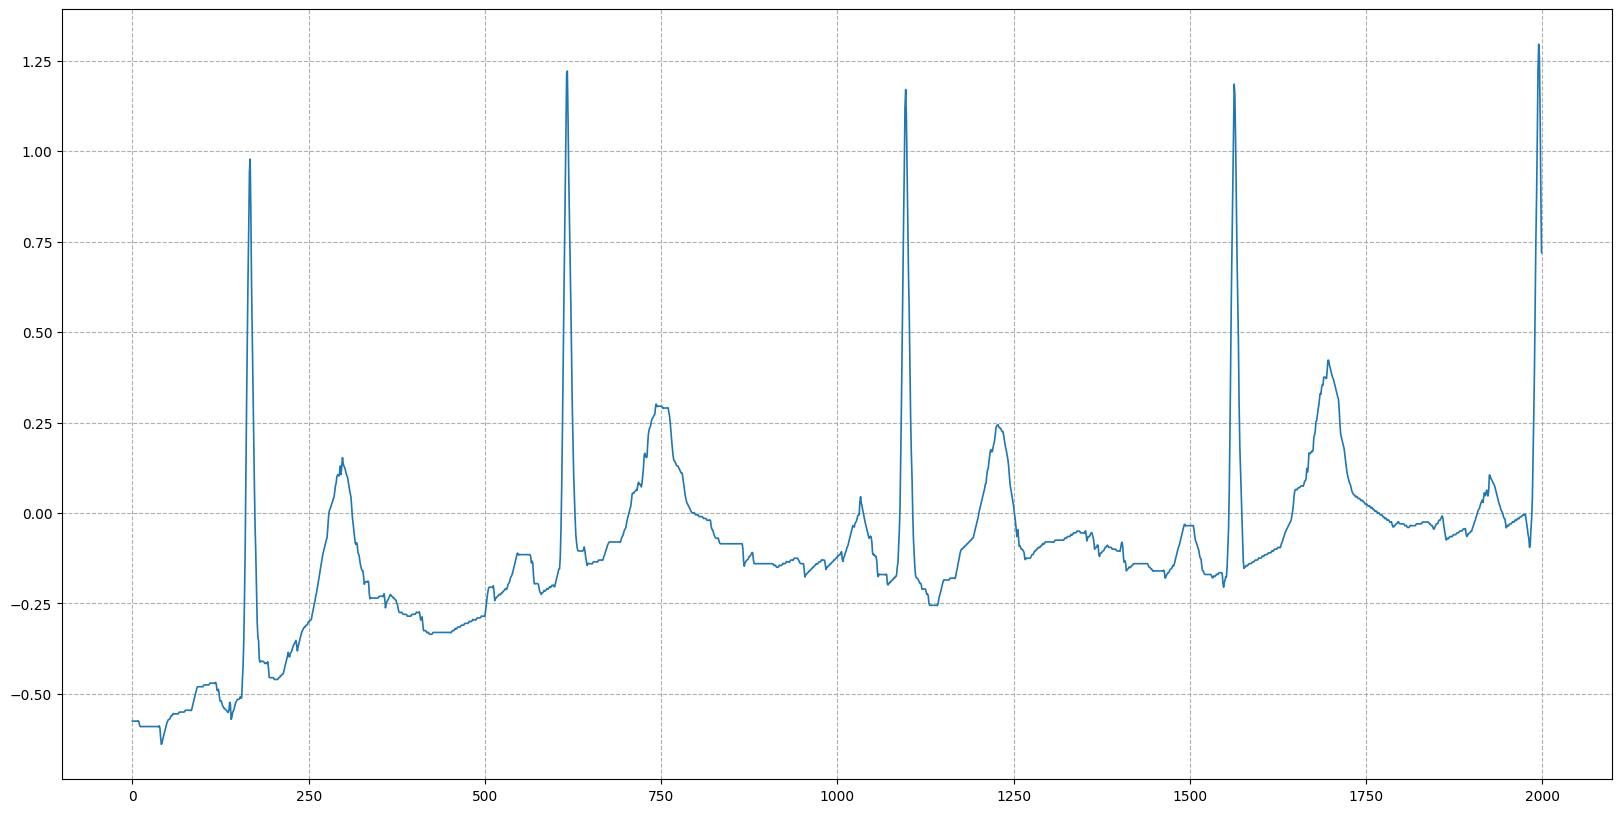

In [ ]:
# just the lead 2
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure()
plt.plot(X[4][:2000,1], linewidth=1.2)
plt.grid(linestyle='--')
# plt.yticks([])
plt.show()

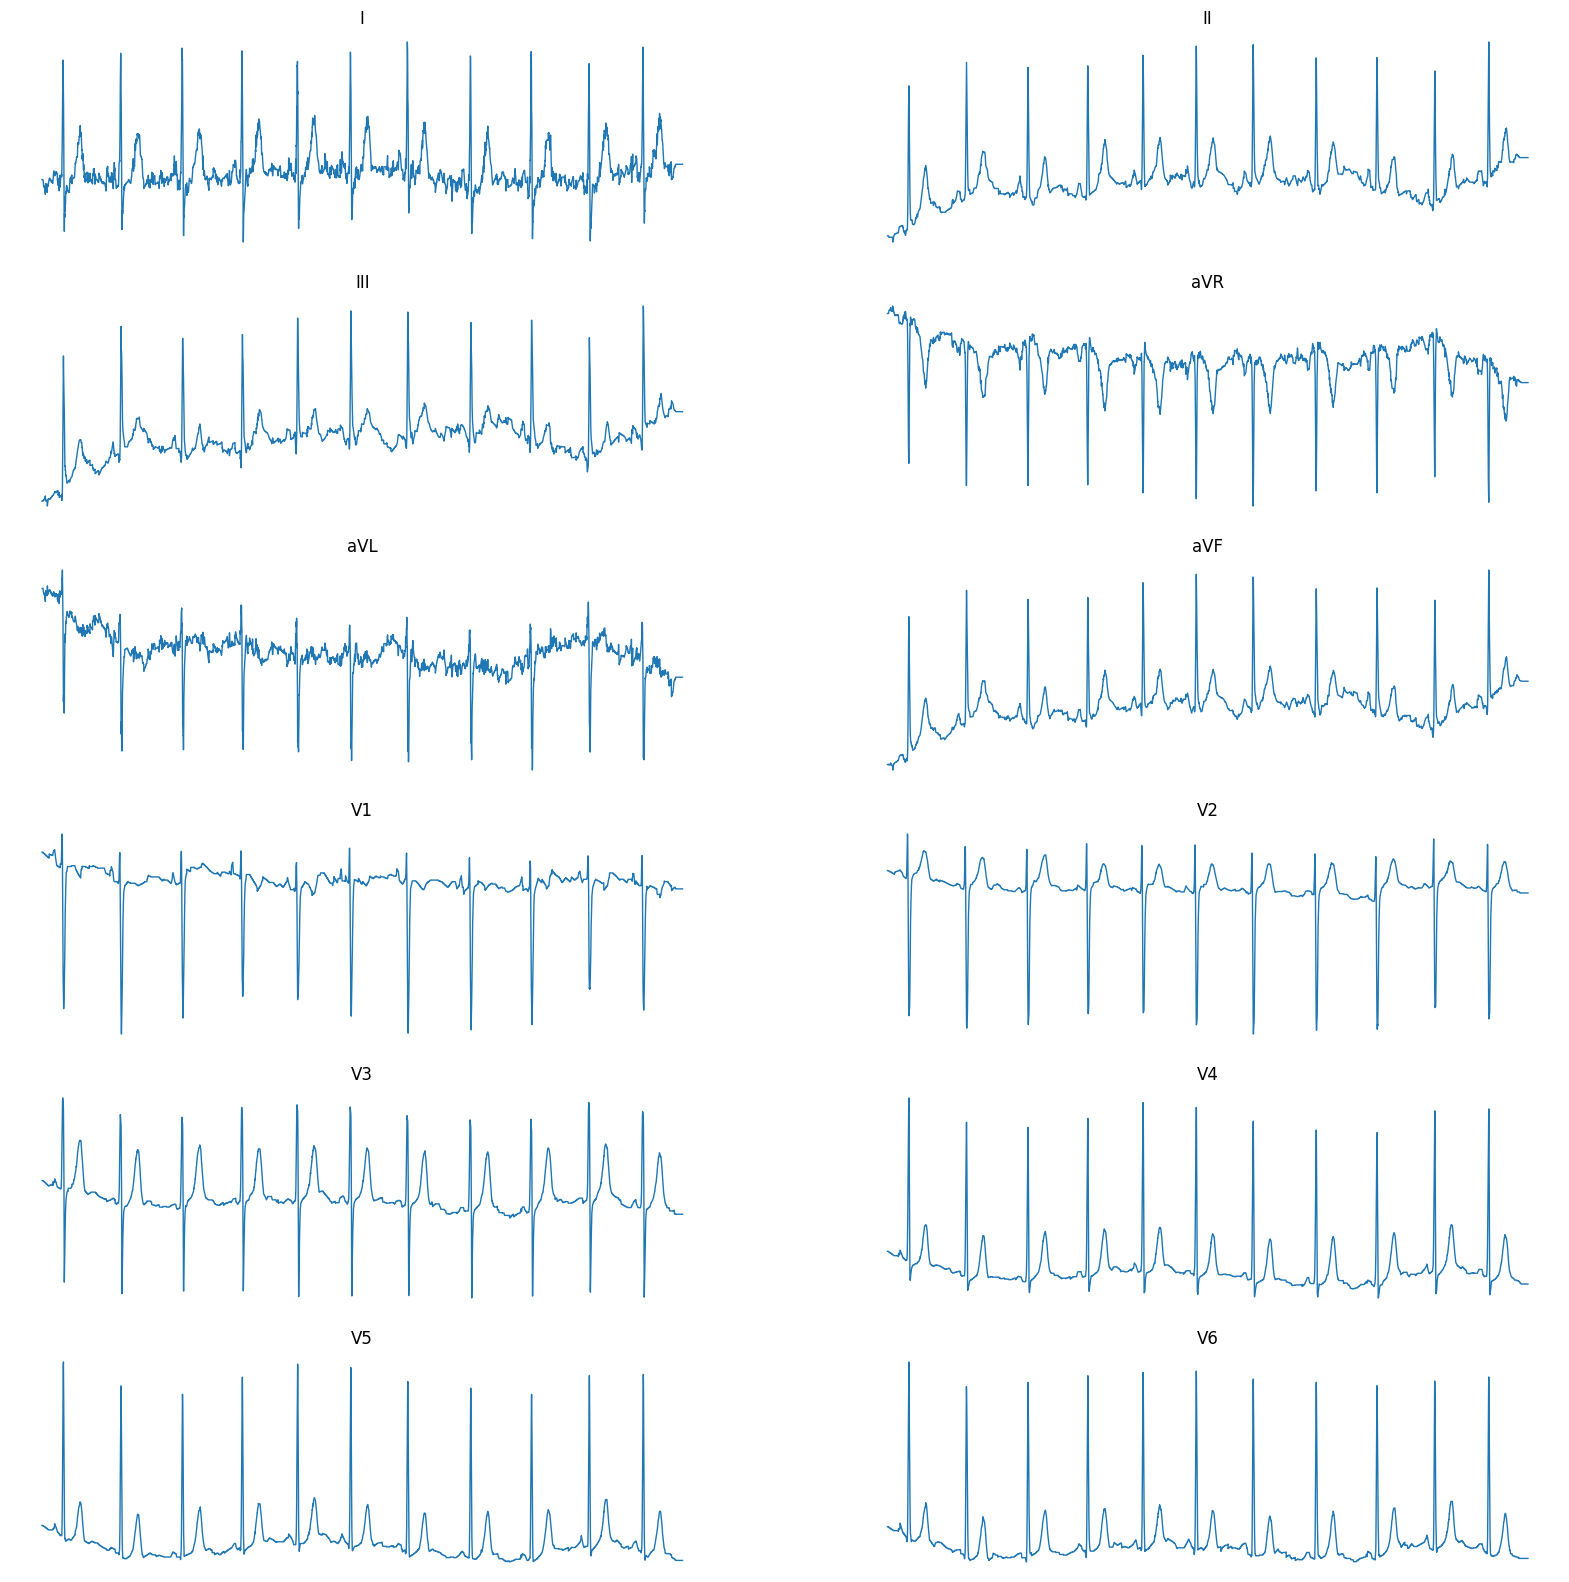

In [ ]:
# check all 12 lead ecg data
ecg = X[4]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)

    # plt.yticks(np.arange(np.min(ecg[:,index]), np.max(ecg[:,index]), 0.1))
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')

plt.show()

In [ ]:
def np_move_avg(a,n,mode="same"):
    return(np.convolve(a, np.ones((n,))/n, mode=mode))


In [ ]:
# fft function
def ecg_fft_ana(ecg_original, sampling_rate):
    fs = sampling_rate
    ts = 1.0/fs
    t = np.arange(0, 1, ts)
    n = len(ecg_original)
    k = np.arange(n)
    t = n/fs
    frq = k/t
    frq = frq[range(int(n/2))]
    fft_ecg = np.abs(fft(ecg_original))[range(int(n/2))]
    return frq, fft_ecg

In [ ]:
# show fft difference of two signals
def show_spec_dif(ecg_original, ecg_filtered, title1="title1", title2 = "title2"):
    frq, fft_ecg = ecg_fft_ana(ecg_original, sampling_rate)
    frq_filtered, fft_ecg_filtered = ecg_fft_ana(ecg_filtered, sampling_rate)
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    plt.figure()
    plt.subplot(221)
    plt.plot(ecg_original[:1500])
    plt.title(title1)
    plt.subplot(222)
    plt.plot(frq,fft_ecg)
    plt.title(title1 + '`s spectrum')
    plt.subplot(223)
    plt.plot(ecg_filtered[:1500])
    plt.title(title2)
    plt.subplot(224)
    plt.plot(frq_filtered, fft_ecg_filtered)
    plt.title(title2 + '`s spectrum')
    plt.show()

In [ ]:
ecg_original = X[10,:,0]
ecg_original2 = X[1000,:,0]
ecg_filtered = np_move_avg(ecg_original, 5)

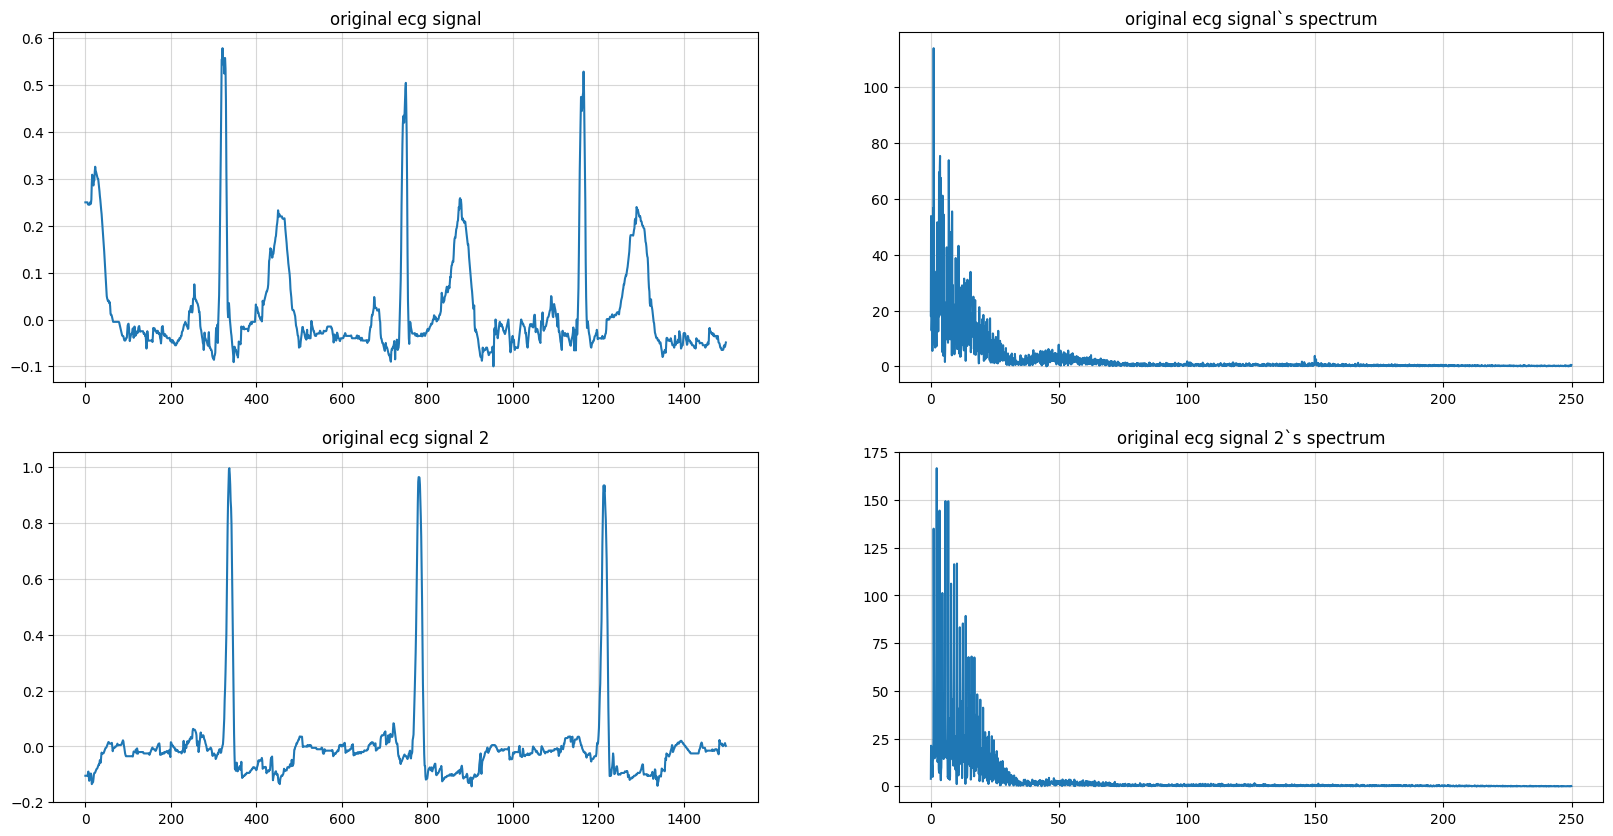

In [ ]:
show_spec_dif(ecg_original, ecg_original2, 'original ecg signal', 'original ecg signal 2')

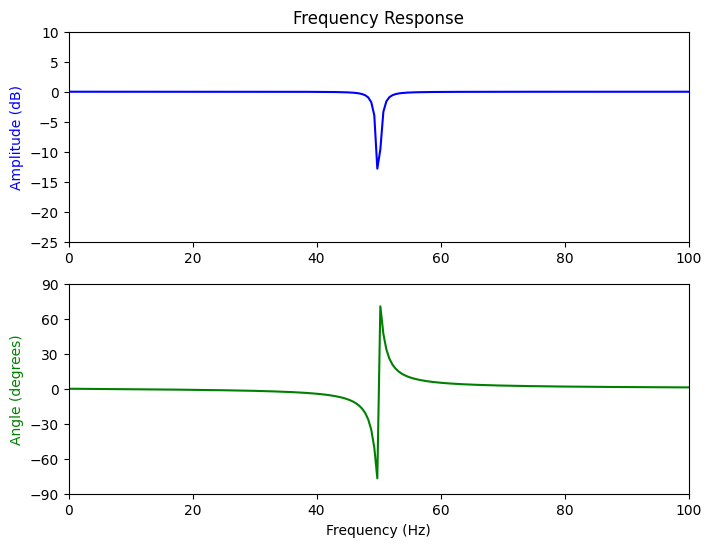

In [ ]:
fs = sampling_rate
f0 = 50.0   # to remove power line interference
Q = 30.0    # quality factor
b, a = signal.iirnotch(f0, Q, fs)

freq, h = signal.freqz(b, a, fs=fs)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()

In [ ]:
ecg_notch = signal.filtfilt(b, a, ecg_filtered)

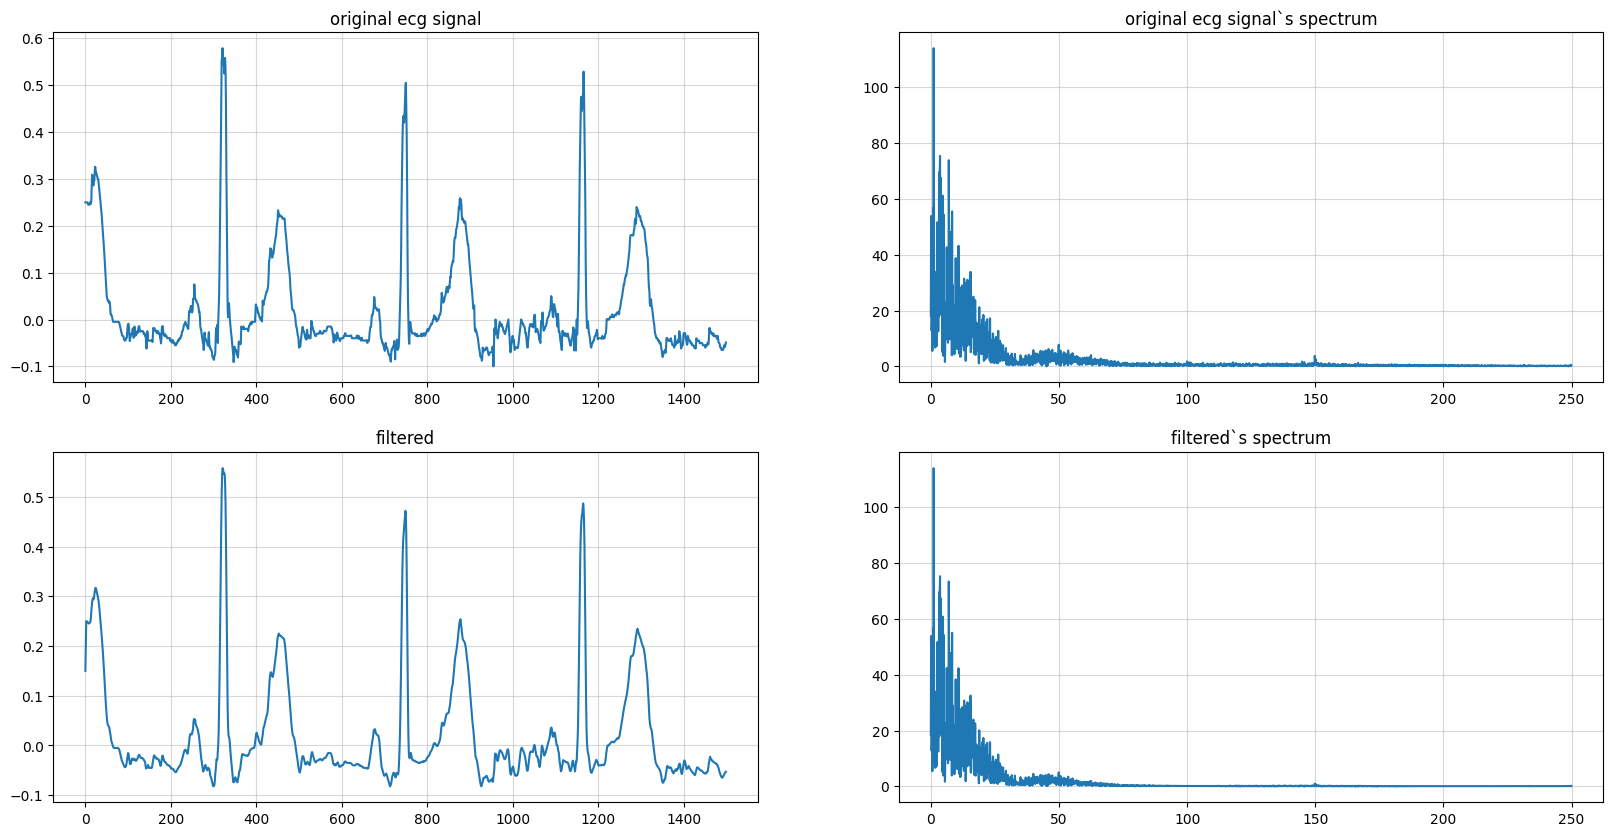

In [ ]:
show_spec_dif(ecg_original, ecg_filtered, 'original ecg signal', 'filtered')

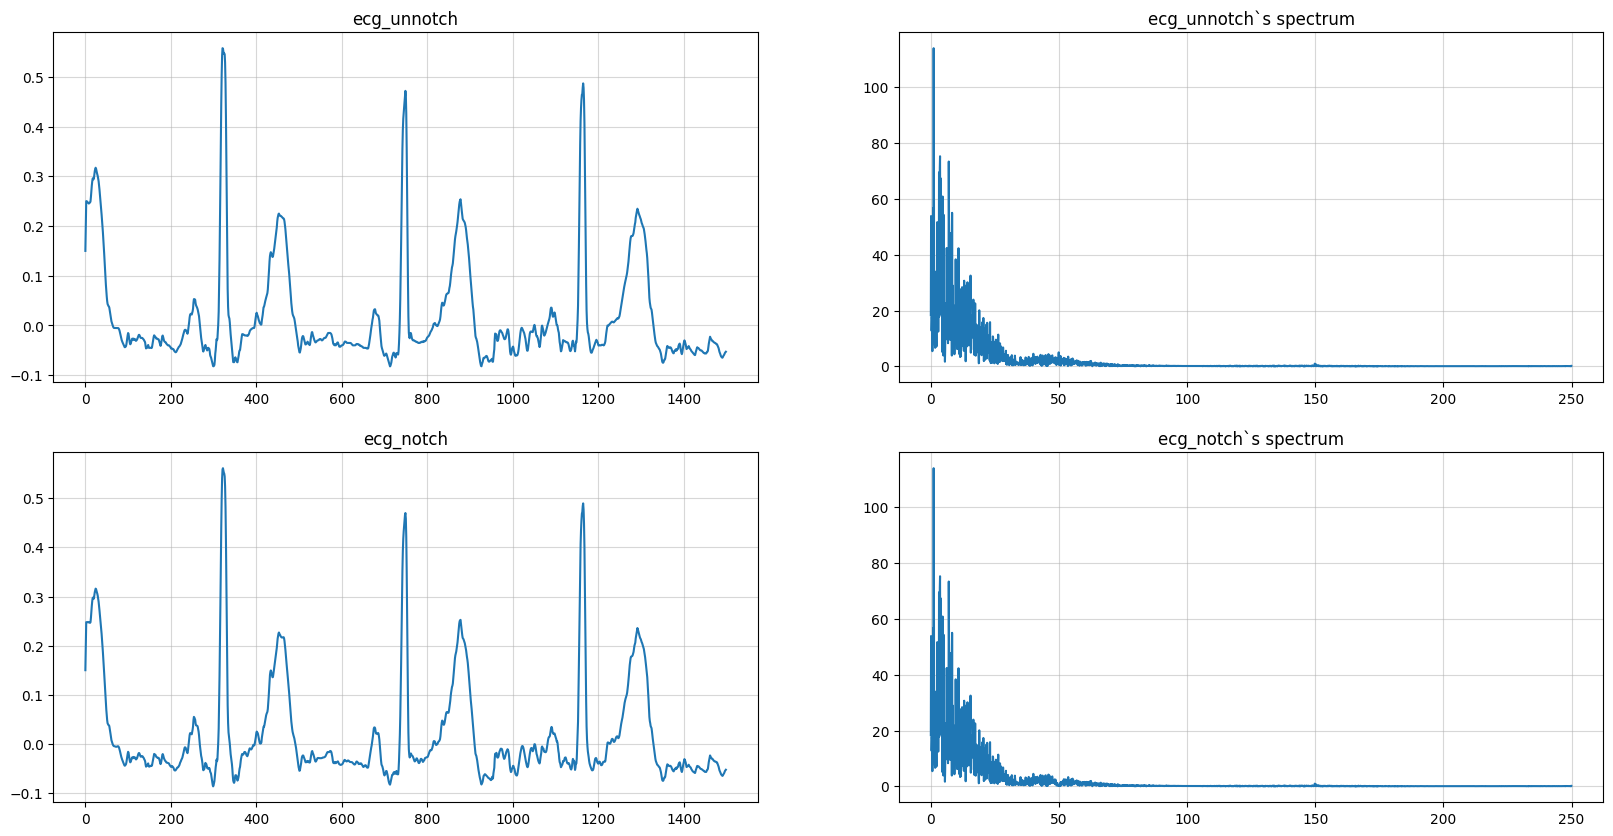

In [ ]:
show_spec_dif(ecg_filtered, ecg_notch, "ecg_unnotch", "ecg_notch")

In [ ]:
channels = 12
for index in range(len(X)):
    for channel in range(channels):
        X[index][:, channel] = np_move_avg(X[index][:, channel], 5)

KeyboardInterrupt: 

In [ ]:
# filter noise in all leads
channels = 12
X_filtered = np.ones_like(X)
for index in range(len(X)):
    if index % 1000 == 0:
        print("---index %d finished filtered, process : %d %%---" % (index, index/X.shape[0]*100))
    for channel in range(channels):
        X_filtered[index][:, channel] = np_move_avg(X[index][:, channel], 5)
print("---all files finished filtering, process 100% !---")

---index 0 finished filtered, process : 0 %---
---index 1000 finished filtered, process : 4 %---
---index 2000 finished filtered, process : 9 %---
---index 3000 finished filtered, process : 14 %---
---index 4000 finished filtered, process : 18 %---
---index 5000 finished filtered, process : 23 %---
---index 6000 finished filtered, process : 28 %---
---index 7000 finished filtered, process : 32 %---
---index 8000 finished filtered, process : 37 %---
---index 9000 finished filtered, process : 42 %---
---index 10000 finished filtered, process : 46 %---
---index 11000 finished filtered, process : 51 %---
---index 12000 finished filtered, process : 56 %---
---index 13000 finished filtered, process : 60 %---
---index 14000 finished filtered, process : 65 %---
---index 15000 finished filtered, process : 70 %---
---index 16000 finished filtered, process : 74 %---
---index 17000 finished filtered, process : 79 %---
---index 18000 finished filtered, process : 84 %---
---index 19000 finished filt

In [ ]:
#save
test_fold = 10
# Train
X_train = X_filtered[(Y_new.strat_fold != test_fold)]
y_train = Y_new[(Y_new.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X_filtered[(Y_new.strat_fold == test_fold)]


In [ ]:
y_test = Y_new[(Y_new.strat_fold == test_fold)].diagnostic_superclass

In [ ]:
#ccheck the shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19269, 5000, 12), (19269,), (2157, 5000, 12), (2157,))

In [ ]:
ecg = X[np.random.randint(len(X))][:,1]


In [ ]:
def get_diff(ecg):
    ecg_diff = np.zeros(len(ecg))
    for i in range(len(ecg)-1):
        ecg_diff[i] = ecg[i+1] - ecg[i]
    ecg_diff[len(ecg)-1] = ecg[len(ecg)-1]
    return ecg_diff

In [ ]:
# 检测R波函数
def checkR(ecg):
    max_val = np.max(ecg)
    min_val = np.min(ecg)
    threshold_val = (max_val-min_val)*0.7 + min_val
    index = []
    for i in range(1, len(ecg)-2):
        # 满足差分阈值条件
        if ecg[i] == np.max(ecg[i-1:i+2]) and ecg[i] > threshold_val:
            # 满足心率间隔60-160
            if index != []:
                if i-index[-1] <= 60.0/60.0*sampling_rate and i-index[-1] >= 60.0/160.0*sampling_rate:
                    index.append(i)
            else:
                index.append(i)
    return np.array(index)

In [ ]:
index = checkR(ecg)

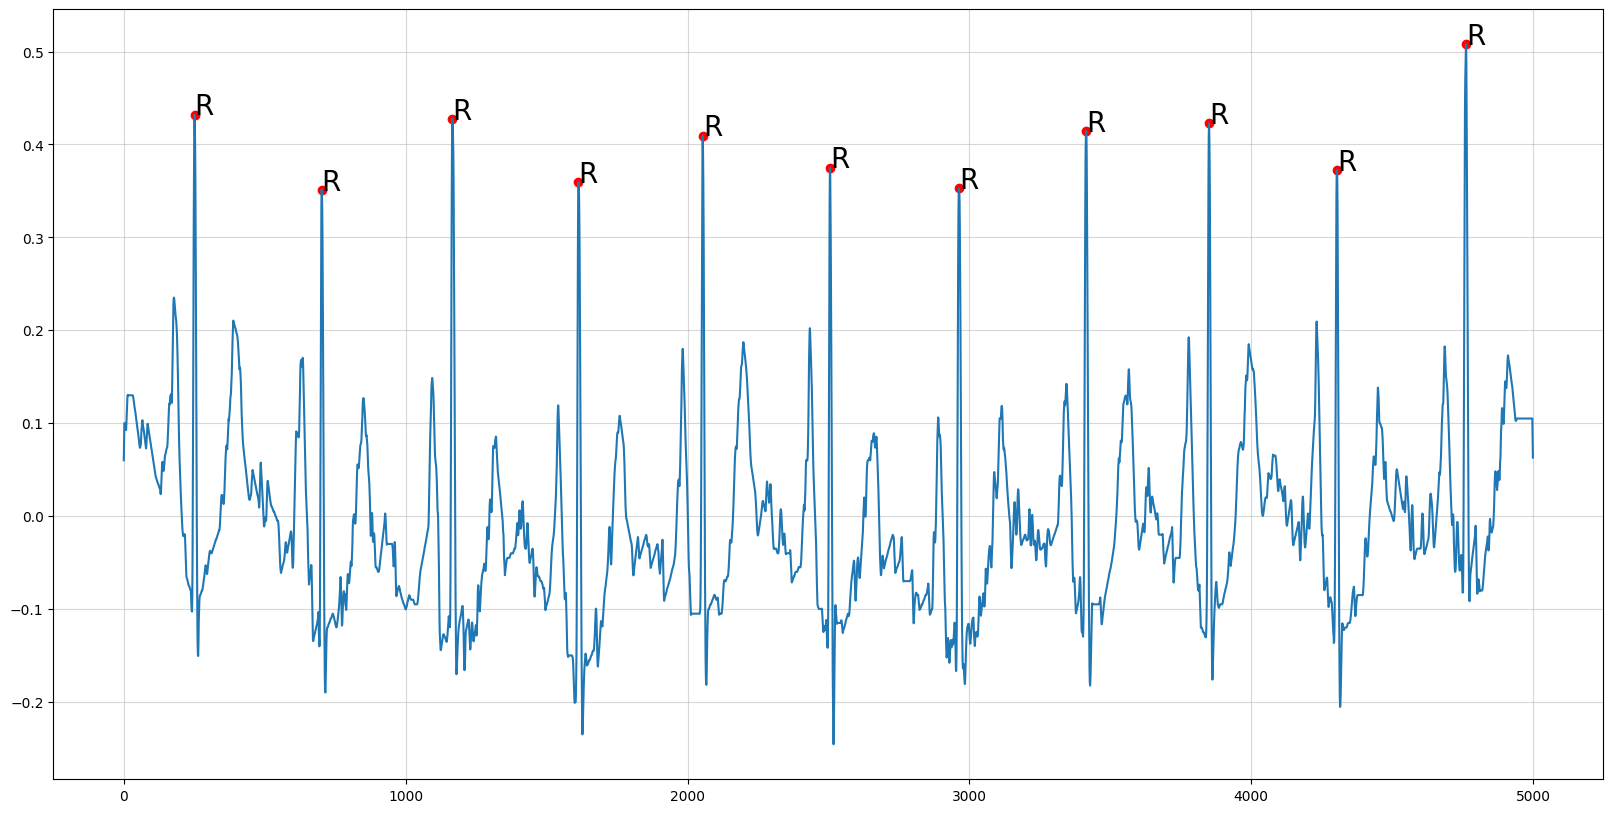

In [ ]:
plt.figure()
plt.plot(ecg)
for i in range(len(index)):
    plt.scatter(index[i], ecg[index[i]],c='r')
    plt.annotate('R',(index[i], ecg[index[i]]), fontsize=20)
plt.show()

In [ ]:
def splitByR(ecg):
    index = checkR(ecg)
    ecg_rhythm = None
    for i in range(len(index)):

        if index[i]>200 and index[i]<1000-350:
            ecg_rhythm = ecg[index[i]-150:index[i]+350]
            continue
    return ecg_rhythm

In [ ]:
ecg_rhythm = splitByR(ecg)

In [ ]:
ecg_rhythm.size

500

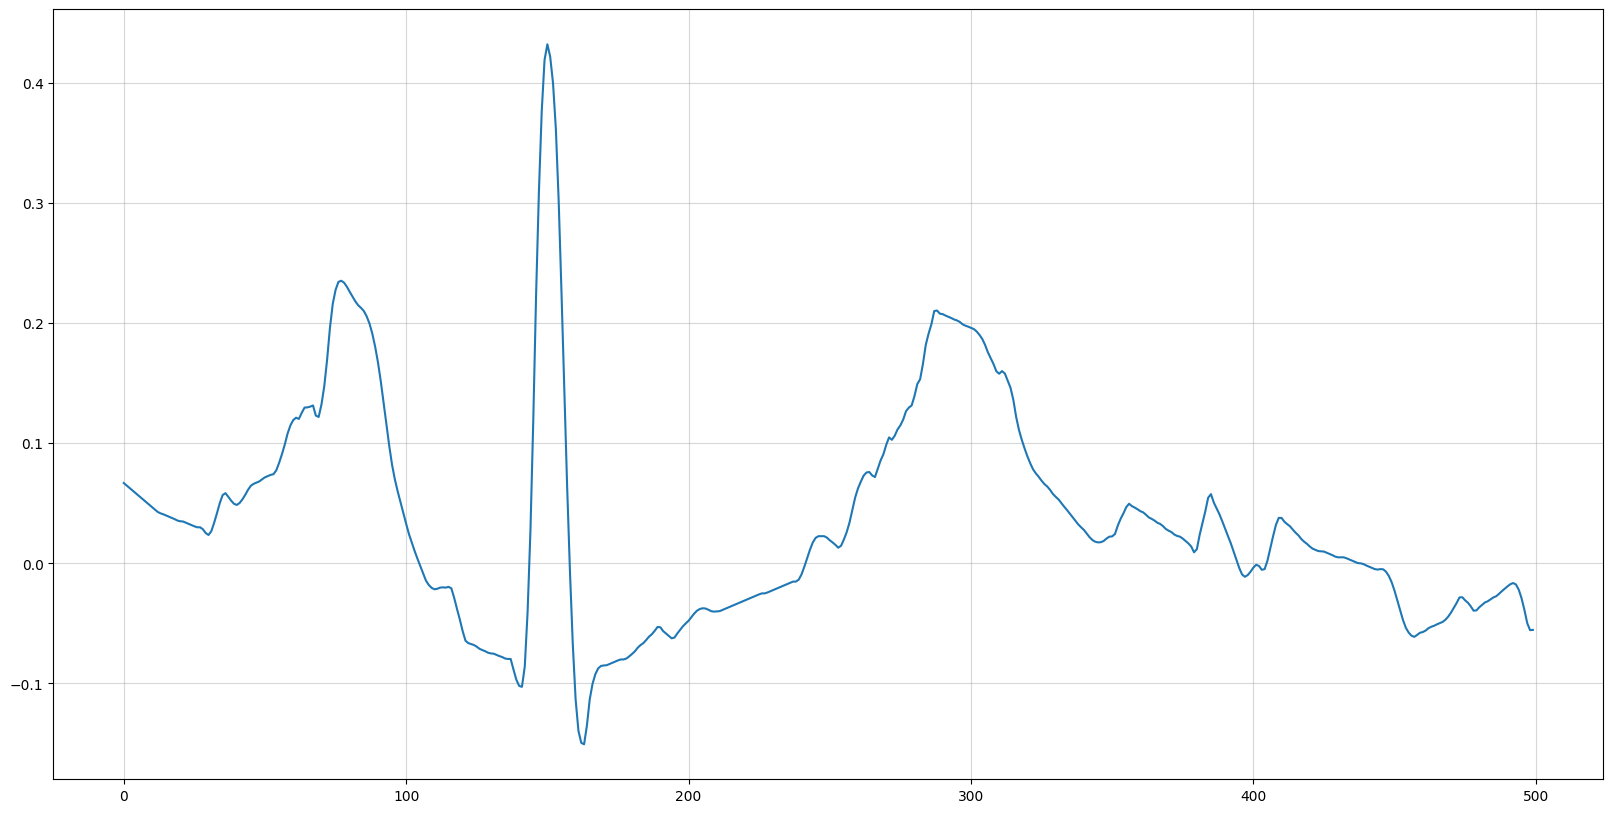

In [ ]:
plt.figure()
plt.plot(ecg_rhythm)
plt.show()

In [ ]:
channels = 12
test_size = len(X)
ecg_rhythms = np.zeros([test_size, 500, 12])

start_time = time.time()
first_time = start_time
for index in range(test_size):
    if index%1000 == 0:
        end_time = time.time()
        print("finish %d in %d s\n" % (index, end_time - start_time))
        start_time = time.time()
    R_index = checkR(X[index][:,1])
    for i in range(len(R_index)):
        # 提取出一段
        if R_index[i]>200 and R_index[i]<1000-350:
            ecg_rhythms[index][:, :] = X[index][R_index[i]-150:R_index[i]+350,:]
            continue

end_time = time.time()

print('time cost:%d s'%(end_time-first_time))

finish 0 in 0 s

finish 1000 in 14 s

finish 2000 in 14 s

finish 3000 in 15 s

finish 4000 in 14 s

finish 5000 in 14 s

finish 6000 in 14 s

finish 7000 in 14 s

finish 8000 in 14 s

finish 9000 in 14 s

finish 10000 in 15 s

finish 11000 in 16 s

finish 12000 in 16 s

finish 13000 in 15 s

finish 14000 in 14 s

finish 15000 in 15 s

finish 16000 in 14 s

finish 17000 in 14 s

finish 18000 in 14 s

finish 19000 in 14 s

finish 20000 in 15 s

finish 21000 in 16 s

time cost:324 s


In [ ]:
ecg_rhythms.shape

(21426, 500, 12)

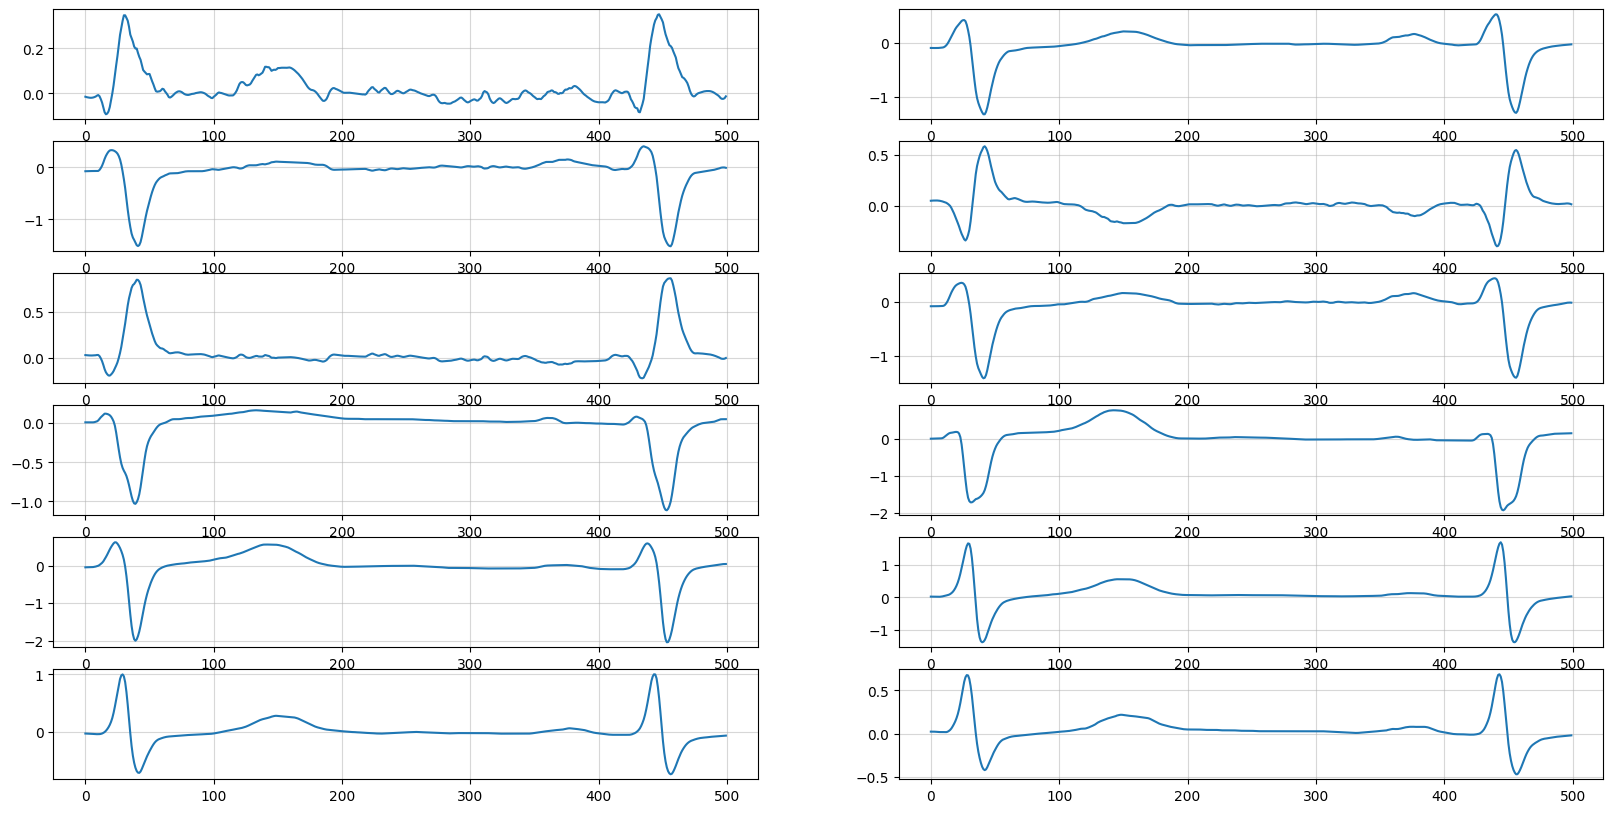

In [ ]:
plt.figure()
for i in range(12):
    plt.subplot(6, 2, i+1)
    plt.plot(ecg_rhythms[40,:,i])
plt.show()

In [ ]:
false_count = 0

Y['Runconfirmed'] = 0
for index in range(len(ecg_rhythms)):
    if ecg_rhythms[index].any() == np.zeros([500, 12]).any():
        false_count += 1
        Y['Runconfirmed'][index] = 1
false_count

/var/folders/t8/cmqhjkhn2g159vwr_m0f94hw0000gn/T/ipykernel_5142/1143737864.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Y['Runconfirmed'][index] = 1
/var/folders/t8/cmqhjkhn2g159vwr_m0f94hw0000gn/T/ipykernel_5142/1143737864.py:7: Sett

2555

In [ ]:
# Split data into train and test
test_fold = 10

# Train
X_train = ecg_rhythms[(Y.strat_fold != test_fold)&(Y.Runconfirmed !=1)]
y_train = Y[(Y.strat_fold != test_fold)&(Y.Runconfirmed !=1)].diagnostic_superclass
# Test
X_test = ecg_rhythms[(Y.strat_fold == test_fold)&(Y.Runconfirmed !=1)]
y_test = Y[(Y.strat_fold == test_fold)&(Y.Runconfirmed !=1)].diagnostic_superclass

In [ ]:
save_path = 'preprocessed/'
np.save(save_path+'X_train.npy', X_train)
np.save(save_path+'y_train.npy', np.array(y_train))
np.save(save_path+'X_test.npy', X_test)
np.save(save_path+'y_test.npy', np.array(y_test))

In [ ]:

data_filepath = 'preprocessed/'
X_train = np.load(data_filepath + 'X_train.npy')
y_train = np.load(data_filepath + 'y_train.npy', allow_pickle=True)
X_test = np.load(data_filepath + 'X_test.npy')
y_test = np.load(data_filepath + 'y_test.npy', allow_pickle=True)

# reshape y_train, y_test
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
def shuffle_train_test(X_train, y_train, X_test, y_test):
    shuffled_indices_x = np.random.permutation(len(y_train))
    shuffled_indices_y = np.random.permutation(len(y_test))

    return X_train[shuffled_indices_x], y_train[shuffled_indices_x], X_test[shuffled_indices_y], y_test[shuffled_indices_y]

In [ ]:
num2class = np.array(['NORM', 'MI', 'STTC', 'CD', 'HYP'])

In [ ]:
np.where(num2class == 'STTC')[0][0]

2

In [ ]:

X_train, y_train, X_test, y_test = shuffle_train_test(X_train, y_train, X_test, y_test)

In [ ]:
X_train.shape

(17025, 500, 12)

In [ ]:
y_train.shape

(17025, 1)

In [ ]:
X_test.shape

(1895, 500, 12)

In [ ]:
print("num2class:", num2class)
print("y_train shape:", y_train.shape)
print("First few y_train values:", y_train[:10])

for index in range(len(y_train)):
    print("Processing index:", index)
    print("Current y_train[index]:", y_train[index])
    where_result = np.where(num2class == y_train[index])
    print("np.where result:", where_result)
    if where_result[0].size == 0:
        print("No match found for y_train[index] in num2class")
        continue
    y_train[index] = where_result[0][0]


num2class: ['NORM' 'MI' 'STTC' 'CD' 'HYP']
y_train shape: (17025, 1)
First few y_train values: [[0]
 [list([])]
 [list(['NORM'])]
 [list(['HYP'])]
 [list(['MI'])]
 [list(['NORM'])]
 [list(['NORM'])]
 [list(['MI'])]
 [list(['NORM'])]
 [list(['STTC', 'CD', 'MI'])]]
Processing index: 0
Current y_train[index]: [0]
np.where result: (array([], dtype=int64),)
No match found for y_train[index] in num2class
Processing index: 1
Current y_train[index]: [list([])]
np.where result: (array([], dtype=int64),)
No match found for y_train[index] in num2class
Processing index: 2
Current y_train[index]: [list(['NORM'])]
np.where result: (array([], dtype=int64),)
No match found for y_train[index] in num2class
Processing index: 3
Current y_train[index]: [list(['HYP'])]
np.where result: (array([], dtype=int64),)
No match found for y_train[index] in num2class
Processing index: 4
Current y_train[index]: [list(['MI'])]
np.where result: (array([], dtype=int64),)
No match found for y_train[index] in num2class
Pro